## Fedderson Approach

The Fedderson approach is a means to combine net section yield and fracture failure criteria in a fashion that agrees well with experimental results. We connect the yield strength to the fracture stress curve using a tangent line.

Consider the example on p. 148 of the text, a center-cracked panel with $K_C = 68 \text{ ksi}\sqrt{\text{in.}}$ and $\sigma_{YS}=63\text{ksi}$ and $W=10"$.

C:\Miniconda2\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


(0, 100)

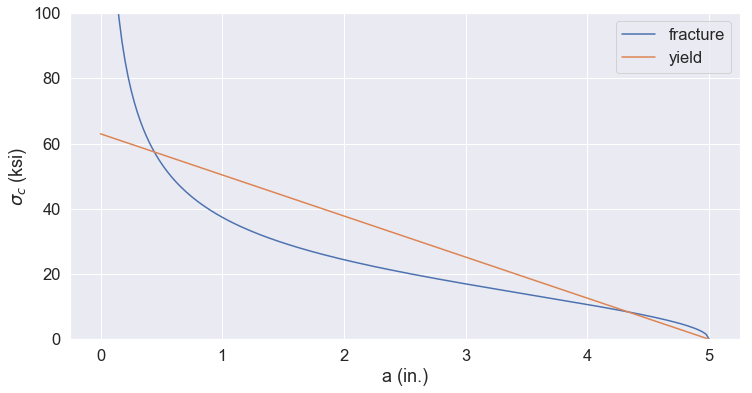

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline

#panel properties
W = 10.0 #in
Kc = 68.0 #ksi sqrt(in)
s_ys = 63.0 #ksi

#crack length array
a = np.linspace(0,5,200)

#fracture criteria
sc_f = Kc/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W)))

#net section yield criteria
sc_y = s_ys*(W-2*a)/W

#preliminary plot
plt.figure(figsize=(12,6))
plt.plot(a,sc_f,label='fracture')
plt.plot(a,sc_y,label='yield')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,100])

Now we find the tangent line to fit between the fracture and yield conditions (from a=0 to a=0.7).

(0, 100)

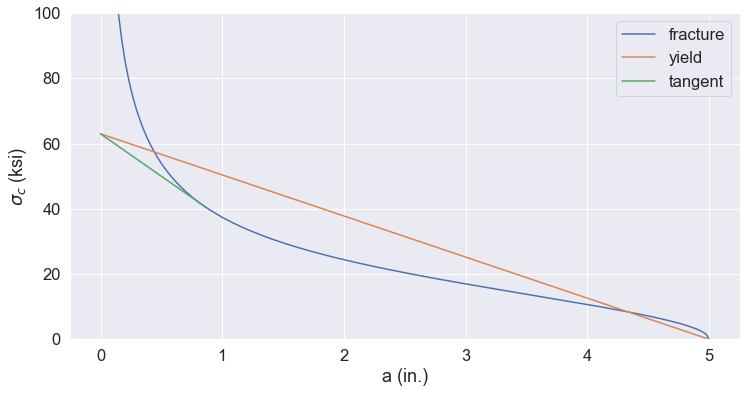

In [3]:
#interpolation library to go between discrete points
from scipy import interpolate
#optimization library
from scipy.optimize import minimize

#interpolations of fracture condition
spl = interpolate.splrep(a[1:],sc_f[1:])
#guess point of intersection
a0 = 0.8

#objective function for optimization
def myobj(a):
    fa = interpolate.splev(a,spl,der=0)
    fprime = interpolate.splev(a,spl,der=1)
    return (sc_y[0] - (fa-fprime*a))**2

#optimize
res = minimize(myobj,a0)
a_int = res.x[0]

#array to plot tangent line
a_tan = np.linspace(0,a_int)

#plot tangent line
fa = interpolate.splev(a_int,spl,der=0)
fprime = interpolate.splev(a_int,spl,der=1)
plt.figure(figsize=(12,6))
plt.plot(a,sc_f,label='fracture')
plt.plot(a,sc_y,label='yield')
plt.plot(a_tan,fa+fprime*(a_tan-a_int),label='tangent')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,100])


The residual strength will be the minimum of each of these three curves at each point.

(0, 100)

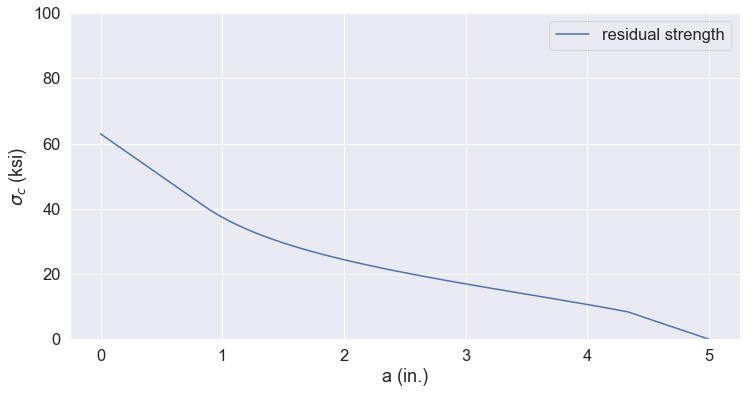

In [4]:
def mymin(a):
    if a < a_int:
        return fa+fprime*(a-a_int)
    else:
        return min([Kc/(np.sqrt(np.pi*a)*np.sqrt(1./np.cos(np.pi*a/W))),s_ys*(W-2*a)/W])

plt.figure(figsize=(12,6))
plt.plot(a,[mymin(i) for i in a],label='residual strength')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.legend(loc='best')
plt.ylim([0,100])